In [1]:
# https://workshop.materialsproject.org/lessons/04_materials_api/MAPI%20Lesson%20%28filled%29/
# This supresses warnings.
import warnings
warnings.filterwarnings('ignore')

# This is a helper function to shorten lists during the 
# live presentation of this lesson for better readability. 
# You can ignore it. 
def shortlist(long_list, n=5):
    print("First {} of {} items:".format(min(n, 5), len(long_list)))
    for item in long_list[0:n]:
        print(item)

In [3]:
!pip install mp-api --user

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [10]:
import os
MP_API_KEY=os.environ.get("foqWelVbBoixU9suS6DAz6xg7RASqTVq")

In [12]:
import os
import requests

response = requests.get("https://next-gen.materialsproject.org/materials/mp-977013", 
                        headers={"X-API-KEY": MP_API_KEY})

print(response.text)

<!DOCTYPE html>
<html>
    <head>
        <meta http-equiv="X-UA-Compatible" content="IE=edge">
      <meta charset="UTF-8">
      <meta name="viewport" content="width=device-width, initial-scale=1">
      <meta name="generator" content="Crystal Toolkit 2022.08.19 (Materials Project)">
            <meta property="og:title" content="mp-977013: H6PbCI3N (Monoclinic, Pm, 6)" />
            <meta property="og:description" content="CH₃NH₃PbI₃ is Pb (Zr_0.50 Ti_0.48) O_3 structured and crystallizes in the monoclinic Pm space group. The structure consists of one CH₃NH₃ cluster inside a PbI₃ framework. In the CH₃NH₃ cluster, C²⁻ is bonded in a tetrahedral geometry to one N³⁻ and three H¹⁺ atoms. The C–N bond length is 1.49 Å. All C–H bond lengths are 1.09 Å. N³⁻ is bonded in a distorted tetrahedral geometry to one C²⁻ and three H¹⁺ atoms. All N–H bond lengths are 1.04 Å. There are four inequivalent H¹⁺ sites. In the first H¹⁺ site, H¹⁺ is bonded in a single-bond geometry to one C²⁻ atom. In th

In [15]:
pip install mp_api

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [26]:
from pymatgen.ext.matproj import MPRester

In [31]:
MP_API_KEY = "foqWelVbBoixU9suS6DAz6xg7RASqTVq"
mpr = MPRester(MP_API_KEY)
mpr.materials.available_fields

['builder_meta',
 'nsites',
 'elements',
 'nelements',
 'composition',
 'composition_reduced',
 'formula_pretty',
 'formula_anonymous',
 'chemsys',
 'volume',
 'density',
 'density_atomic',
 'symmetry',
 'material_id',
 'structure',
 'deprecated',
 'deprecation_reasons',
 'initial_structures',
 'task_ids',
 'deprecated_tasks',
 'calc_types',
 'last_updated',
 'created_at',
 'origins',
 'warnings',
 'task_types',
 'run_types',
 'entries']

In [32]:
with MPRester(MP_API_KEY) as mpr:
    print(mpr.thermo.available_fields)

['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'material_id', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'thermo_type', 'thermo_id', 'uncorrected_energy_per_atom', 'energy_per_atom', 'energy_uncertainy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'decomposition_enthalpy', 'decomposition_enthalpy_decomposes_to', 'energy_type', 'entry_types', 'entries']


In [33]:
### Don't edit this code ####
from pymatgen.electronic_structure.plotter import BSPlotter
# Helpful function for plotting a bandstructure. 
def plot_bandstructure(bs):
    BSPlotter(bs).get_plot().show() 
#############################

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

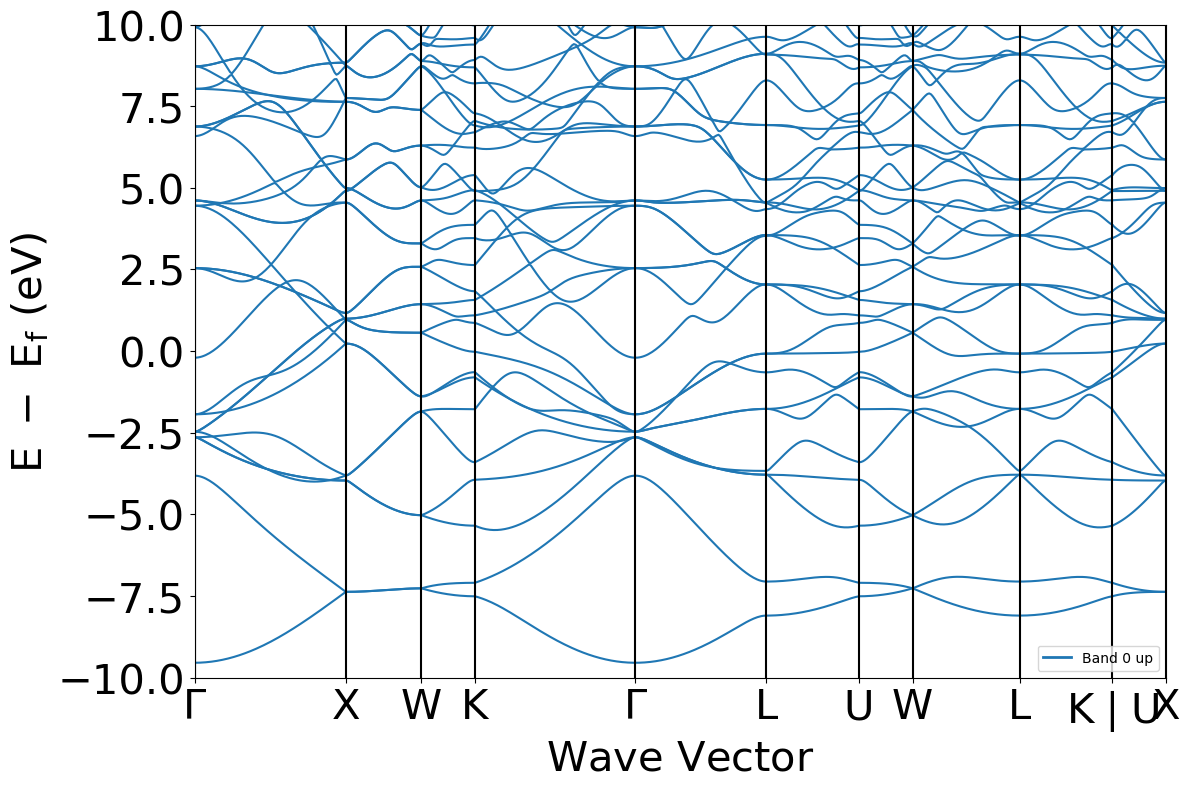

In [34]:
# Use the MPRester's get_bandstructure_by_material_id method to 
# get a bandstructure from the MP Database and plot it using the
# plot_bandstructure functin defined above.
with MPRester(MP_API_KEY) as mpr:
    bs = mpr.get_bandstructure_by_material_id("mp-1234")

plot_bandstructure(bs) 

In [35]:
with MPRester(MP_API_KEY) as mpr:
    # You can pass in a formula to get_materials_ids
    shortlist(mpr.get_materials_ids("LiFePO4"))
    # Or you can pass in a "chemsys" such as "Li-Fe-P-O"
    shortlist(mpr.get_materials_ids("Li-Fe-P-O"))

Retrieving MaterialsDoc documents:   0%|          | 0/70 [00:00<?, ?it/s]

First 5 of 70 items:
mp-18951
mp-19017
mp-26041
mp-26559
mp-26611


Retrieving MaterialsDoc documents:   0%|          | 0/386 [00:00<?, ?it/s]

First 5 of 386 items:
mp-6373
mp-18951
mp-19017
mp-19294
mp-19430


In [39]:
# Get the structure for Ca3Ti2O7 (mp-4163) and 
# suggest some substrates for growing it.
with MPRester(MP_API_KEY) as mpr:
    structure = mpr.get_structure_by_material_id("mp-4163")
#     substrates = mpr.get_substrates("mp-4163")
    print(structure)
#     print([s["sub_form"] for s in substrates])

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Full Formula (Ca6 Ti4 O14)
Reduced Formula: Ca3Ti2O7
abc   :  10.113645  10.113645   5.537287
angles:  90.000000  90.000000 148.661619
pbc   :       True       True       True
Sites (24)
  #  SP           a         b         c    magmom
---  ----  --------  --------  --------  --------
  0  Ca    0.253586  0.253586  0.961184         0
  1  Ca    0.746414  0.746414  0.461184         0
  2  Ca    0.553818  0.929128  0.544023         0
  3  Ca    0.446182  0.070872  0.044023         0
  4  Ca    0.929128  0.553818  0.544023         0
  5  Ca    0.070872  0.446182  0.044023         0
  6  Ti    0.151203  0.351233  0.511477         0
  7  Ti    0.848797  0.648767  0.011477         0
  8  Ti    0.648767  0.848797  0.011477         0
  9  Ti    0.351233  0.151203  0.511477         0
 10  O     0.155043  0.928236  0.784897        -0
 11  O     0.844957  0.071764  0.284897        -0
 12  O     0.071764  0.844957  0.284897        -0
 13  O     0.928236  0.155043  0.784897        -0
 14  O     0.

In [42]:
# Here we query with the explicit formula
with MPRester(MP_API_KEY) as mpr:
    results = mpr.summary.search(formula="SiO2")
    print(len(results))

Retrieving SummaryDoc documents:   0%|          | 0/321 [00:00<?, ?it/s]

321


In [44]:
print('Results are returned as a {} of {}.\n'.format(type(results), type(results[0])))

print(results[0])

Results are returned as a <class 'list'> of <class 'pydantic.main.MPDataDoc'>.

MPDataDoc<SummaryDoc>
builder_meta=EmmetMeta(emmet_version='0.36.9', pymatgen_version='2022.4.19', pull_request=None, database_version=None, build_date=datetime.datetime(2022, 10, 5, 21, 35, 38, 853000)),
nsites=108,
elements=[Element O, Element Si],
nelements=2,
composition=Comp: Si36 O72,
composition_reduced=Comp: Si1 O2,
formula_pretty='SiO2',
formula_anonymous='AB2',
chemsys='O-Si',
volume=2030.3204564291652,
density=1.7690822039651897,
density_atomic=18.799263485455235,
symmetry=SymmetryData(crystal_system=<CrystalSystem.ortho: 'Orthorhombic'>, symbol='Pnnm', number=58, point_group='mmm', symprec=0.1, version='1.16.2'),
property_name='summary',
material_id=MPID(mp-558025),
deprecated=False,
deprecation_reasons=None,
last_updated=datetime.datetime(2022, 10, 5, 21, 35, 38, 853000),
origins=[],
warnings=[],
structure=Structure Summary
Lattice
    abc : 7.515454 14.277452 18.921635
 angles : 90.0 90.0 90.0

In [45]:
# Access data as an attribute
doc = results[0]

material_id = doc.material_id
print(material_id, "\n")

structure = doc.structure
print(structure)

mp-558025 

Full Formula (Si36 O72)
Reduced Formula: SiO2
abc   :   7.515454  14.277452  18.921635
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (108)
  #  SP           a         b         c    magmom
---  ----  --------  --------  --------  --------
  0  Si    0.221829  0.697354  0.666901        -0
  1  Si    0.721829  0.802646  0.166901        -0
  2  Si    0.207972  0.999502  0.773319        -0
  3  Si    0         0.5       0.847608         0
  4  Si    0.511278  0.799435  0.583104         0
  5  Si    0         0.5       0.152392         0
  6  Si    0.988722  0.299435  0.083104         0
  7  Si    0.511278  0.799435  0.416896         0
  8  Si    0.190416  0.292288  0.317322        -0
  9  Si    0.988722  0.299435  0.916896         0
 10  Si    0.809584  0.707712  0.317322        -0
 11  Si    0.778171  0.302646  0.666901        -0
 12  Si    0.278171  0.197354  0.166901        -0
 13  Si    0.309584  0.792288  0.817322        -0
 14  Si

In [46]:
# Access data through dictionary keys
doc = results[0].dict()

material_id = doc["material_id"]
print(material_id, "\n")

structure = doc["structure"]
print(structure)

mp-558025 

Full Formula (Si36 O72)
Reduced Formula: SiO2
abc   :   7.515454  14.277452  18.921635
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (108)
  #  SP           a         b         c    magmom
---  ----  --------  --------  --------  --------
  0  Si    0.221829  0.697354  0.666901        -0
  1  Si    0.721829  0.802646  0.166901        -0
  2  Si    0.207972  0.999502  0.773319        -0
  3  Si    0         0.5       0.847608         0
  4  Si    0.511278  0.799435  0.583104         0
  5  Si    0         0.5       0.152392         0
  6  Si    0.988722  0.299435  0.083104         0
  7  Si    0.511278  0.799435  0.416896         0
  8  Si    0.190416  0.292288  0.317322        -0
  9  Si    0.988722  0.299435  0.916896         0
 10  Si    0.809584  0.707712  0.317322        -0
 11  Si    0.778171  0.302646  0.666901        -0
 12  Si    0.278171  0.197354  0.166901        -0
 13  Si    0.309584  0.792288  0.817322        -0
 14  Si

In [48]:
with MPRester(MP_API_KEY) as mpr:
    results = mpr.summary.search(formula='**O3', fields=["material_id", "formula_pretty"])
    data_list = [(result.material_id, result.formula_pretty) for result in results]

Retrieving SummaryDoc documents:   0%|          | 0/2537 [00:00<?, ?it/s]

In [49]:
shortlist(data_list)

First 5 of 2537 items:
(MPID(mp-775774), 'AgBiO3')
(MPID(mp-1417649), 'AlWO3')
(MPID(mp-18954), 'ScMnO3')
(MPID(mp-865927), 'AcTiO3')
(MPID(mp-1099668), 'SmNiO3')
